In [45]:
import sys
import subprocess

subprocess.check_call([sys.executable, "-m", "pip", "install", "seaborn"])


0

Import the library that we will use 

In [46]:
import os, sys, re, json
import numpy as np
import pandas as pd
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import sys, subprocess
import seaborn as sns



RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("Python:", sys.version.split()[0])
print("Working dir:", os.getcwd())


Python: 3.13.3
Working dir: C:\Users\bbuser\Desktop\DataScience\DataScience-Brain-Bytes\Team_members\from_shihab


# 1- Data Acquisition and Preparation Description

The Kaggle dataset Car Price Prediction has been downloaded

In [22]:
DATA_CSV = Path("Data/CarPrice_Assignment.csv")  


df_raw = pd.read_csv(DATA_CSV)
df_raw.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


lowercase and removes spaces or special characters

In [23]:
def normalize_columns(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df.columns = (
        df.columns
          .str.strip()
          .str.replace(r"[\s/]+", "_", regex=True)
          .str.replace(r"[^0-9a-zA-Z_]", "", regex=True)
          .str.lower()
    )
    return df

df = normalize_columns(df_raw)
df.head(3)


,car_id,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


- Just chake if their is any missing value 

In [24]:
df.isnull().sum()

car_id              0
symboling           0
carname             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

- Split your dataset into features (X) and target (y) first

Frist we need to Selling_Price if that's your target column(1),We separate it because the model should learn to predict y using X, not memorize it. Then  drop the target(2), because if we keep it in X, the model would cheat (it would have access to the answer). After that Identify numeric and categorical columns(3). 

In [58]:
#1
y = df["price"]   
#2
X = df.drop(columns=["price"])  

#3
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)


Numeric columns: ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
Categorical columns: ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand']


This step makes sure your dataset is in the correct numeric form for training in tearm of keep numeric columns as they are, Convert categoricals into numbers and Drop everything else

In [26]:
numeric_preprocess = "passthrough"

categorical_preprocess = OneHotEncoder(handle_unknown="ignore")

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_preprocess, numeric_cols),
        ("cat", categorical_preprocess, categorical_cols),
    ],
    remainder="drop"
)


This line make sure the model is traning on one part of the data and evaluated 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [28]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_id            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   carname           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [29]:

df.describe()

,car_id,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


we drop the column car_id because it’s not a real feature, only an identifier, and keeping it would hurt model accuracy.

In [30]:
df = df.drop(columns=["car_id"])

In [31]:
df

,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


we do this just to check and see if symboling is useful in predicting price, so in case correlation is very low, it may not be important for linear regression, but it could still matter for tree-based models 

In [32]:
df[["symboling","price"]].corr()


,symboling,price
symboling,1.000000,-0.079978
price,-0.079978,1.000000


In [33]:
df["brand"] = df["carname"].str.split(" ").str[0]


In [34]:
df = df.drop(columns=["carname"])


In [35]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [36]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (164, 25)
Testing set shape: (41, 25)


# 2- Exploratory Data Analysis (EDA) & Feature Engineering.

- Step 1 — Scatter plots

- we use Scatter plots to see linear or non-linear trends

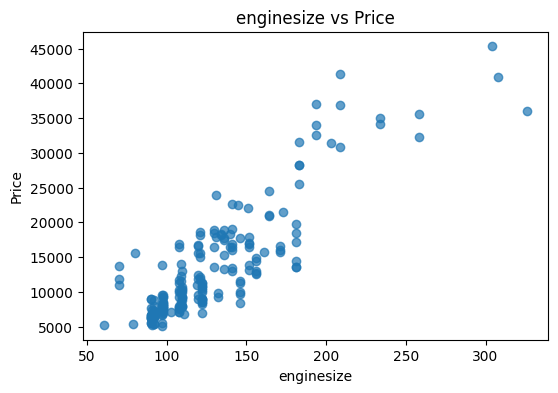

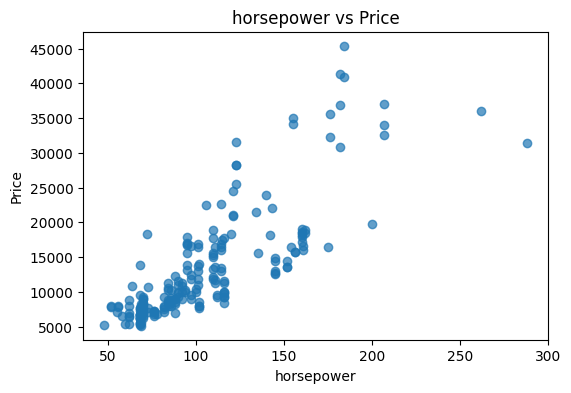

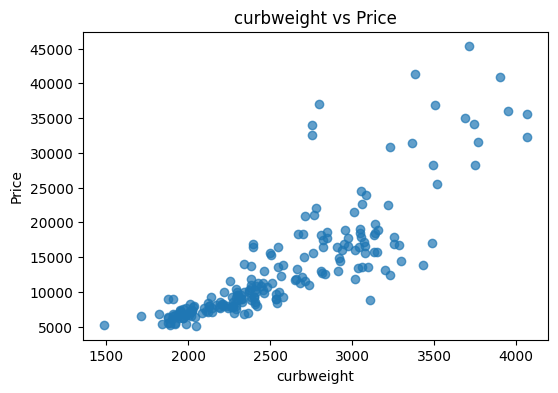

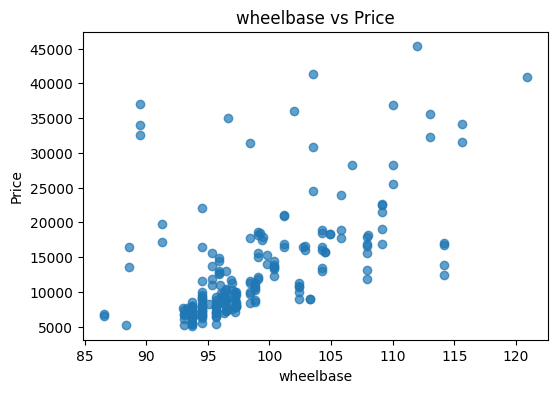

In [40]:
key_features = ["enginesize", "horsepower", "curbweight", "wheelbase"]

for col in key_features:
    plt.figure(figsize=(6,4))
    plt.scatter(df[col], df["price"], alpha=0.7)
    plt.title(f"{col} vs Price")
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.show()


# step 2 -heatmap

This step Shows a heatmap of correlations between all numeric features.

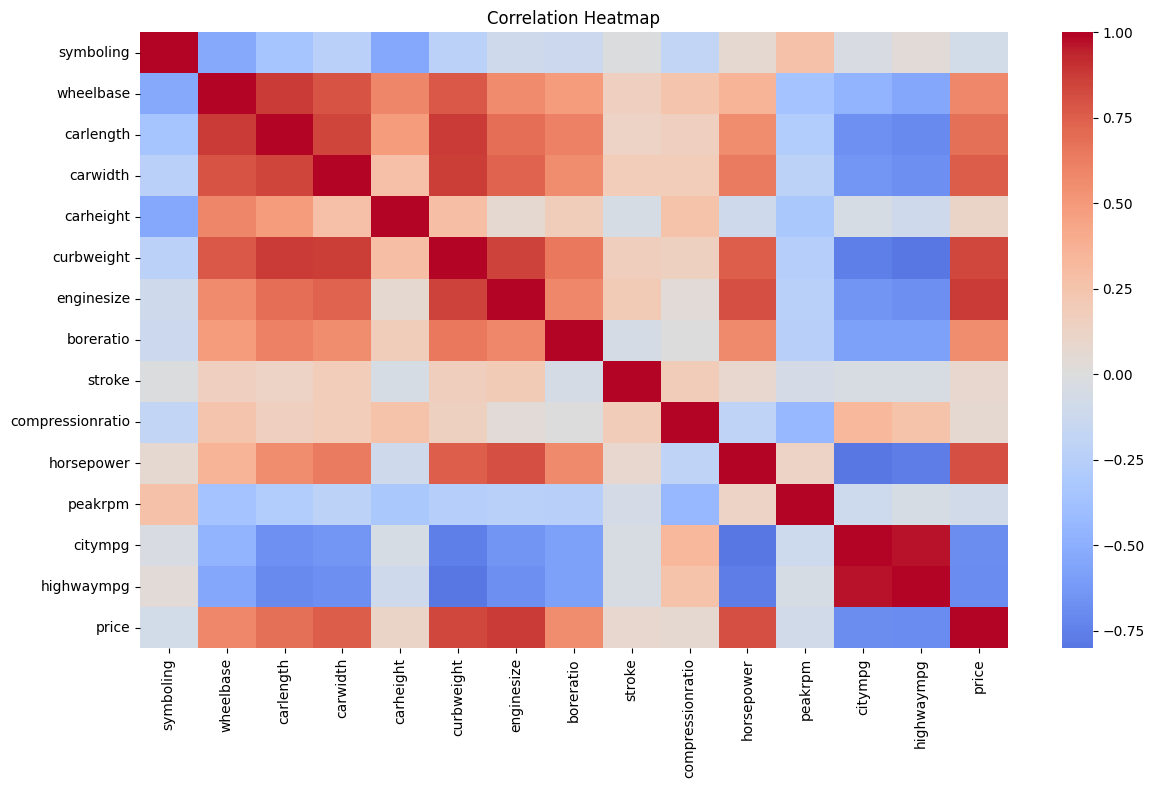

price         1.000000
enginesize    0.874145
curbweight    0.835305
horsepower    0.808139
carwidth      0.759325
carlength     0.682920
wheelbase     0.577816
boreratio     0.553173
carheight     0.119336
stroke        0.079443
Name: price, dtype: float64


In [47]:
plt.figure(figsize=(14,8))
corr = df.corr(numeric_only=True)   
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


corr_price = corr["price"].sort_values(ascending=False)
print(corr_price.head(10))

# 3 step - boxplot

To shows the distribution and outliers for enginesize, horsepower, and price.

C:\Users\bbuser\AppData\Local\Temp\ipykernel_29248\311845498.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[col], vert=True, labels=[col])


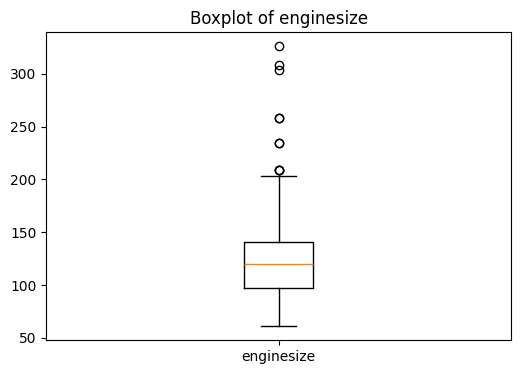

C:\Users\bbuser\AppData\Local\Temp\ipykernel_29248\311845498.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[col], vert=True, labels=[col])


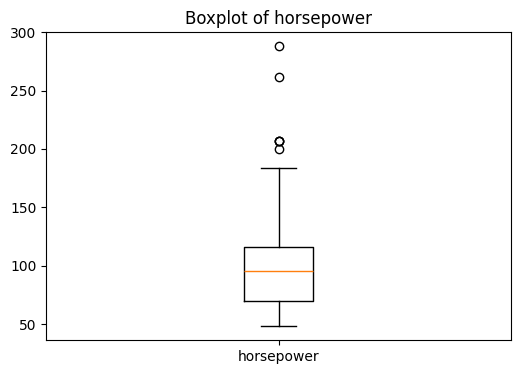

C:\Users\bbuser\AppData\Local\Temp\ipykernel_29248\311845498.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[col], vert=True, labels=[col])


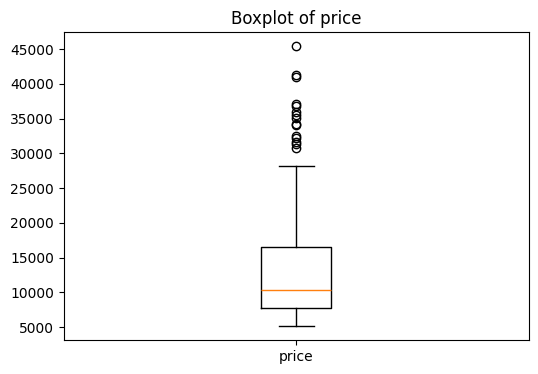

In [48]:
for col in ["enginesize", "horsepower", "price"]:
    plt.figure(figsize=(6,4))
    plt.boxplot(df[col], vert=True, labels=[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# 3- Model Development and Comparison

- For this step we need to use some library like:
  

In [49]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


- Define helper function for evaluation

In [51]:

def evaluate_model(model, X_train_enc, y_train, X_test_enc, y_test):
    model.fit(X_train_enc, y_train)
    y_pred = model.predict(X_test_enc)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return rmse, r2


- we make sure you split the dataset

In [54]:
y = df["price"]
X = df.drop(columns=["price"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

- Define preprocessing (numeric + categorical)

In [55]:
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

numeric_preprocess = "passthrough"
categorical_preprocess = OneHotEncoder(handle_unknown="ignore")

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_preprocess, numeric_cols),
        ("cat", categorical_preprocess, categorical_cols),
    ],
    remainder="drop"
)

- Transform train/test

In [56]:
X_train_enc = preprocess.fit_transform(X_train)
X_test_enc  = preprocess.transform(X_test)

In [57]:
results = {}

lin_reg = LinearRegression()
results["Linear Regression"] = evaluate_model(lin_reg, X_train_enc, y_train, X_test_enc, y_test)

ridge = Ridge(alpha=1.0, random_state=42)
results["Ridge Regression"] = evaluate_model(ridge, X_train_enc, y_train, X_test_enc, y_test)

lasso = Lasso(alpha=0.01, random_state=42, max_iter=10000)
results["Lasso Regression"] = evaluate_model(lasso, X_train_enc, y_train, X_test_enc, y_test)

rf = RandomForestRegressor(n_estimators=200, random_state=42)
results["Random Forest"] = evaluate_model(rf, X_train_enc, y_train, X_test_enc, y_test)

gb = GradientBoostingRegressor(n_estimators=200, random_state=42)
results["Gradient Boosting"] = evaluate_model(gb, X_train_enc, y_train, X_test_enc, y_test)

print("Model Comparison (RMSE ↓, R² ↑)")
for model_name, (rmse, r2) in results.items():
    print(f"{model_name:20s} | RMSE: {rmse:.2f} | R²: {r2:.3f}")



Model Comparison (RMSE ↓, R² ↑)
Linear Regression    | RMSE: 2811.38 | R²: 0.900
Ridge Regression     | RMSE: 2760.14 | R²: 0.903
Lasso Regression     | RMSE: 2913.95 | R²: 0.892
Random Forest        | RMSE: 1801.93 | R²: 0.959
Gradient Boosting    | RMSE: 2352.52 | R²: 0.930
